In [3]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
np.random.seed(23)

In [4]:
forest_fire = pd.read_csv('forest_fires_dataset.csv')
attr = pd.read_csv('attributes_forest_fires.csv')

In [5]:
print(forest_fire.keys())
attr
# see what are the names of the columns in this date set
# of course with such a command I do not get any info what the column means
# downloaded one csv file which contains the explanations

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


,name,type,description
0,X,integer,x-axis spatial coordinate within the Montesinh...
1,Y,integer,y-axis spatial coordinate within the Montesinh...
2,month,string,month of the year: 'jan' to 'dec'
3,day,string,day of the week: 'mon' to 'sun'
4,FFMC,float,FFMC index from the FWI system: 18.7 to 96.20
5,DMC,float,DMC index from the FWI system: 1.1 to 291.3
6,DC,float,DC index from the FWI system: 7.9 to 860.6
7,ISI,float,ISI index from the FWI system: 0.0 to 56.10
8,temp,float,temperature in Celsius degrees: 2.2 to 33.30
9,RH,float,relative humidity in %: 15.0 to 100


***On Wikipedia I can check what the abbreviation means***

**Fine Fuel Moisture Code** - 
The Fine Fuel Moisture Code (FFMC) represents fuel moisture of forest litter fuels under the shade of a forest canopy. It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. ... It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels.

**Duff Moisture Code** - 
The Duff Moisture Code (DMC) represents fuel moisture of decomposed organic material underneath the litter. System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. It is unitless and open ended.

**The Fire Weather Index** - (FWI) integrates current ISI and BUI to produce a unitless index of general fire intensity potential. It is analogous to NFDRS Burning Index. With dry fuel conditions, it is a key indicator of extreme fire behavior potential.

In [6]:
forest_fire.head()
# looks at the first lines

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


In [7]:
forest_fire.info()
# I use info and know there is no null value anywhere

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [8]:
forest_fire.describe()
# I can observe different parameters of this data, you can see that the DC column has a high standard deviation,
# which can also be seen right on the chart
# data has a different range so it will definitely need to be standardized


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


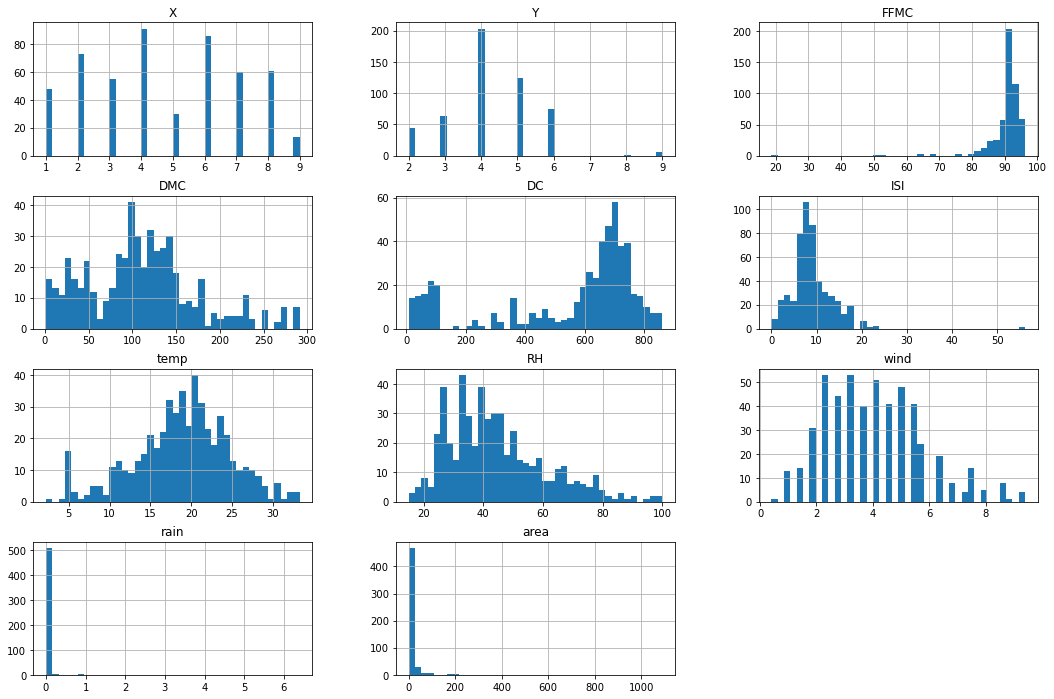

In [9]:
forest_fire.hist(bins = 40, figsize=(18, 12))
plt.show()
# visualizing the data shown in histograms
# some of them have a distribution close to the normal distribution, e.g. ISI, temp, FFMC - although here a bit less

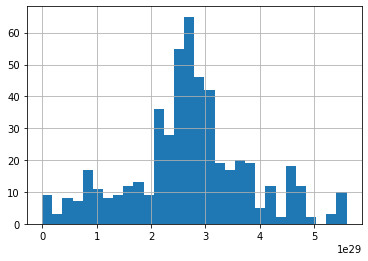

In [10]:
np.power(forest_fire["FFMC"], 15).hist(bins = 30)
plt.show()
# Comment on the FFMC chart is close to the normal spread. Here, after modifying the data, the function x ^ 15

**WYKRESY POKAZUJACE ZALEZNOŚĆ MIEDZY WYBRANYMI ZMIENNEYMI**

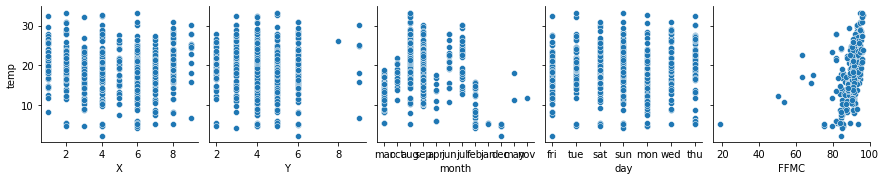

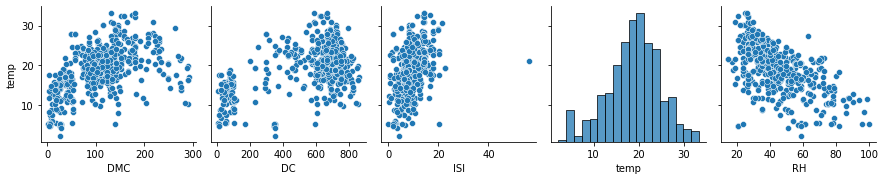

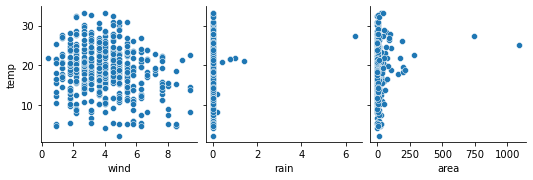

In [11]:
sns.pairplot(forest_fire, y_vars="temp", x_vars=forest_fire.columns.values[:5])
sns.pairplot(forest_fire, y_vars="temp", x_vars=forest_fire.columns.values[5:10])
sns.pairplot(forest_fire, y_vars="temp", x_vars=forest_fire.columns.values[10:])
plt.show()

# you can notice that the RH chart from temp is a little curved, but maybe it can be represented in some other way
# to make the relationship more linear.
# the remaining graphs are either a line-like dependence as in ISI on temp, or at first glance
# seems to be scattered or the data is processed continuously with discontinuous

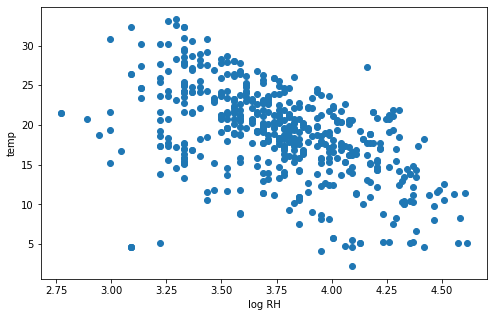

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(np.log1p(forest_fire['RH']), forest_fire['temp'])
plt.xlabel('log RH')
plt.ylabel('temp')
plt.show()
# we use log (1 + x) for this. Now you can see that the dependencies are more linear

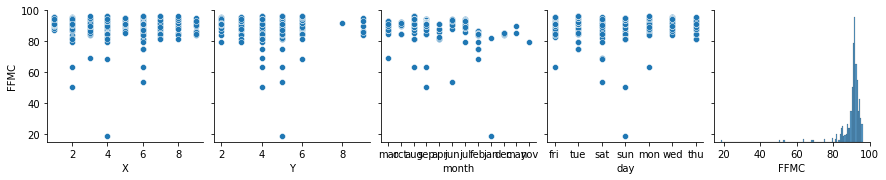

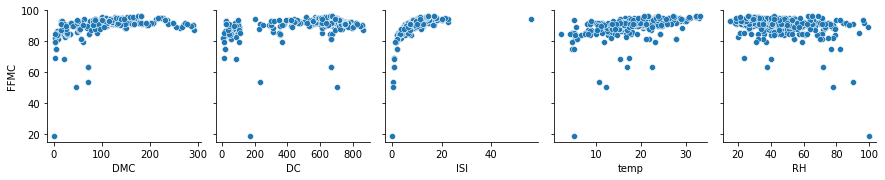

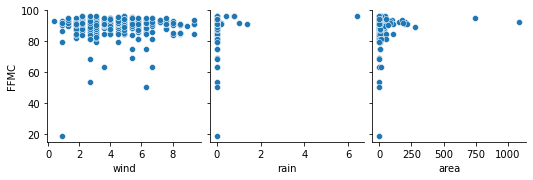

In [14]:
'''
In this case we have many linear dependencies. Some values of the points disturb it a bit and it spoils it a bit
these linearity but they are single records so maybe they will play the role of outliners.
In addition, an interesting example is the ISI chart from FFMC. The data is not linear but will form a curve. 
Therefore, it may be possible to straighten them somehow.
Maybe in general it would not be necessary to do this, but since we are studying linear regression in this case, it is
'''


sns.pairplot(forest_fire, y_vars="FFMC", x_vars=forest_fire.columns.values[:5])
sns.pairplot(forest_fire, y_vars="FFMC", x_vars=forest_fire.columns.values[5:10])
sns.pairplot(forest_fire, y_vars="FFMC", x_vars=forest_fire.columns.values[10:])
plt.show()

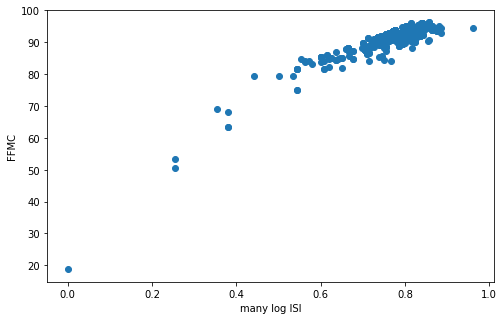

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(np.log1p(np.log1p(np.log1p(forest_fire['ISI']))), forest_fire['FFMC'])
plt.xlabel('many log ISI')
plt.ylabel('FFMC')
plt.show()
# for this I used the log (1 + x) function 3 times. How many times this function could be used could also be one of the hyperparameters,
# which could be checked

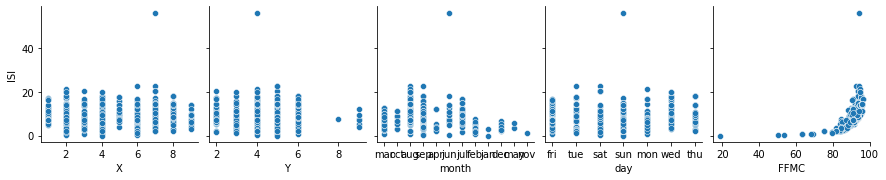

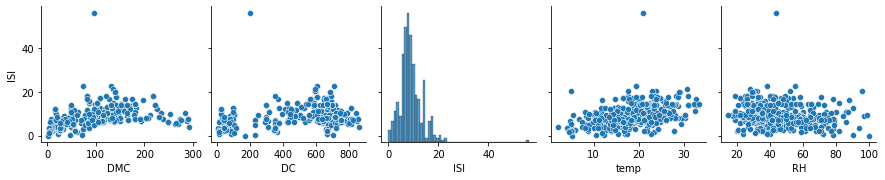

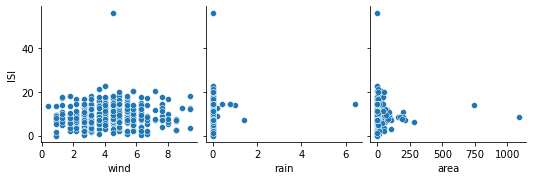

In [16]:
sns.pairplot(forest_fire, y_vars="ISI", x_vars=forest_fire.columns.values[:5])
sns.pairplot(forest_fire, y_vars="ISI", x_vars=forest_fire.columns.values[5:10])
sns.pairplot(forest_fire, y_vars="ISI", x_vars=forest_fire.columns.values[10:])
plt.show()
# here analgically as before. We have a lot of almost linear dependency. As before, however, I would like to focus on
# FFMC chart from ISI that strongly resembles the exponential function

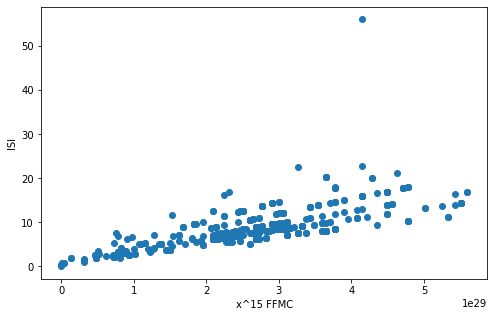

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(np.power(forest_fire['FFMC'], 15), forest_fire['ISI'])
plt.xlabel('x^15 FFMC')
plt.ylabel('ISI')
plt.show()
# to make it look more like a line graph, I used the function x ^ 15. As in the previous example, the value of the exponent
# could be a trainable hyperparameter.